In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'trainaba:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4790441%2F8109761%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240513%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240513T021956Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Db04cc91c1cd13b39a4ba0186486a640a052d122af0ddd6571f45554b7abbf39ba0b7a4c049e9aaf2c3510ccb99ae7fea8c55f6e5f107a33ec9f505908ab3cce5b0ffc4d79452f182191c888012d9c71ea332741f1f60c576457ed1bd55affa9f633036e292b95ca44a31ea15dd8bbe75c3857287bb71219283826e67ef98eb35bb571e22f7efb40b2cd2cf963ad7b81e55a173104e7ea3cc95229460efd56cf90cdc60125d2ecfb155ffa8fd07e0127c49521f8796078ee6448f62a559165bd1f7bfe4a3ff6d0ea911a07f446371a63c53d203d8187e2bfeafbea5ad67f45abf0b14e5a163fc5b063eb0a84e90bb9da9ac57912df9803abdf46eb0df61b58883,testaba:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4791091%2F8110646%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240513%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240513T021956Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D2f27510a757bdf4d395a3d9c3ecf5036b8777ed426c437826bd4a282a678cfddcd27a7392f53c485db34e4c6db78f14890eda61800f9afd32cd8835a3644687bb7b08e40f07a144adc3b51511c7b0a702c7e705f9fb2f8773fa8252717e0a1d63ac6a75a2a51a53acef40ce4a7bdcaf910254375c19a6ddefd5bb3c4652c4ea746ef8f20638d2b239820d1de7dc15b23027156dba7d9f9b8d8ea2835d6e243e21fadb0300c480f9ad69f57897ece087059aa051b91c4d0f5d7a39aff35ca9edffedaff72998ac7d71569a25d1324ac3a62c41e7ab26047201e1336ddbe750e7e3011a2af2977f926233097b2389cff8dfc9cd4fa5f894a4259e18eacade7a63a'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/testaba/test.csv
/kaggle/input/trainaba/train.csv


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_data = pd.read_csv('/kaggle/input/trainaba/train.csv')

In [ ]:
train_data.head(10)

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9
5,5,F,0.610,0.480,0.170,1.2010,0.5335,0.3135,0.3085,10
6,6,M,0.415,0.325,0.110,0.3315,0.1655,0.0715,0.1300,9
7,7,F,0.610,0.490,0.150,1.1165,0.4955,0.2945,0.2950,9
8,8,I,0.205,0.150,0.040,0.0460,0.0145,0.0105,0.0100,4
9,9,I,0.565,0.425,0.125,0.6510,0.3795,0.1420,0.1800,8


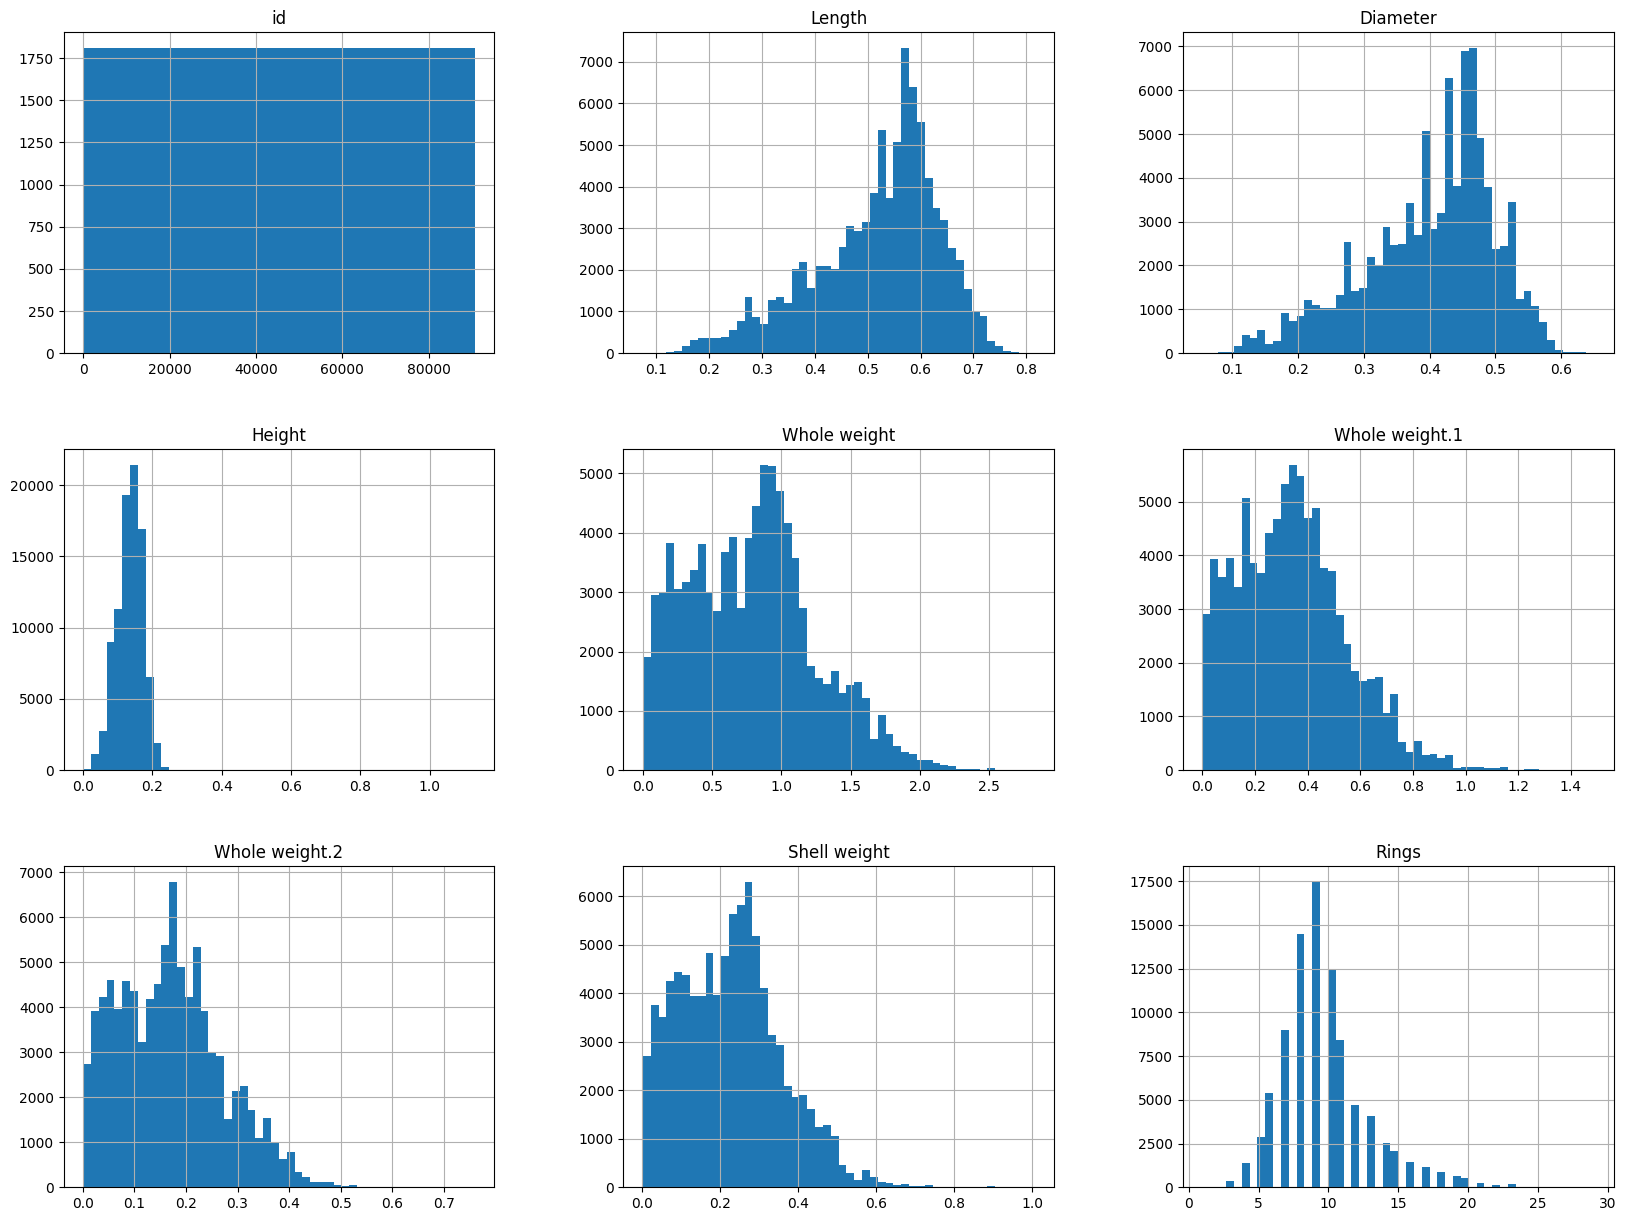

In [ ]:
train_data.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
print(train_data.dtypes)

id                  int64
Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Whole weight.1    float64
Whole weight.2    float64
Shell weight      float64
Rings               int64
dtype: object


In [ ]:
train_data = pd.get_dummies(train_data, columns=['Sex'])

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90615 entries, 0 to 90614
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              90615 non-null  int64  
 1   Length          90615 non-null  float64
 2   Diameter        90615 non-null  float64
 3   Height          90615 non-null  float64
 4   Whole weight    90615 non-null  float64
 5   Whole weight.1  90615 non-null  float64
 6   Whole weight.2  90615 non-null  float64
 7   Shell weight    90615 non-null  float64
 8   Rings           90615 non-null  int64  
 9   Sex_F           90615 non-null  bool   
 10  Sex_I           90615 non-null  bool   
 11  Sex_M           90615 non-null  bool   
dtypes: bool(3), float64(7), int64(2)
memory usage: 6.5 MB


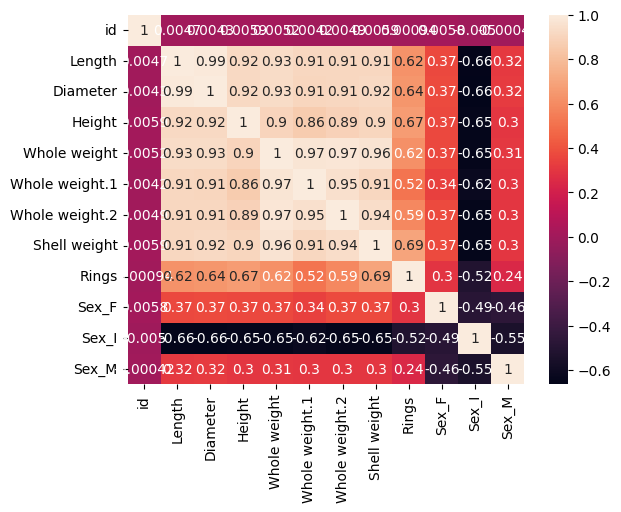

In [ ]:
corr_matrix = train_data.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [ ]:
train_data.head()

,id,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11,True,False,False
1,1,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11,True,False,False
2,2,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6,False,True,False
3,3,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10,False,False,True
4,4,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9,False,True,False


In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
x_train = train_data.drop(columns=['id','Rings'])
y_train = train_data['Rings']

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
gb_model = GradientBoostingRegressor()
lr_model = LinearRegression()
rf_model.fit(x_train, y_train)
gb_model.fit(x_train, y_train)
lr_model.fit(x_train, y_train)

LinearRegression()

In [ ]:
test_data = pd.read_csv('/kaggle/input/testaba/test.csv')

In [ ]:
test_data.head(10)

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
0,90615,M,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005
1,90616,M,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750
2,90617,M,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405
3,90618,M,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350
4,90619,I,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050
5,90620,M,0.560,0.425,0.140,0.8105,0.3525,0.1915,0.2150
6,90621,M,0.635,0.490,0.170,1.1835,0.4605,0.2445,0.3550
7,90622,I,0.340,0.250,0.075,0.1675,0.0750,0.0330,0.0480
8,90623,I,0.485,0.370,0.110,0.5360,0.2565,0.0980,0.1490
9,90624,F,0.640,0.500,0.195,1.3380,0.6470,0.3175,0.3965


In [ ]:
test_data = pd.get_dummies(test_data, columns=['Sex'])

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60411 entries, 0 to 60410
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              60411 non-null  int64  
 1   Length          60411 non-null  float64
 2   Diameter        60411 non-null  float64
 3   Height          60411 non-null  float64
 4   Whole weight    60411 non-null  float64
 5   Whole weight.1  60411 non-null  float64
 6   Whole weight.2  60411 non-null  float64
 7   Shell weight    60411 non-null  float64
 8   Sex_F           60411 non-null  bool   
 9   Sex_I           60411 non-null  bool   
 10  Sex_M           60411 non-null  bool   
dtypes: bool(3), float64(7), int64(1)
memory usage: 3.9 MB


In [ ]:
x_test = test_data.drop(columns='id')

In [ ]:
pred1 = rf_model.predict(x_test)
pred2 = gb_model.predict(x_test)
pred3 = lr_model.predict(x_test)

In [ ]:
final_predictions = (pred1 + pred2 + pred3)/3

In [ ]:
print(final_predictions[:10])

[ 9.44441875  9.83111545 10.23376893 10.87489775  7.73958385  9.68936213
 11.92029792  6.25652961  7.95931853 11.79676292]


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [ ]:
cv_scores_model1 = cross_val_score(rf_model, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_scores_model2 = cross_val_score(gb_model, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_scores_model3 = cross_val_score(lr_model, x_train, y_train, cv=5, scoring='neg_mean_squared_error')

In [ ]:
rmse_model1 = np.sqrt(-cv_scores_model1.mean())
rmse_model2 = np.sqrt(-cv_scores_model2.mean())
rmse_model3 = np.sqrt(-cv_scores_model3.mean())

In [ ]:
print("Average Cross-Validation RMSE for RandomForestRegressor:", rmse_model1)
print("Average Cross-Validation RMSE for GradientBoostingRegressor:", rmse_model2)
print("Average Cross-Validation RMSE for LinearRegression:", rmse_model3)

Average Cross-Validation RMSE for RandomForestRegressor: 1.879424027534636
Average Cross-Validation RMSE for GradientBoostingRegressor: 1.8842010097041229
Average Cross-Validation RMSE for LinearRegression: 1.9954558685713653


In [ ]:
submission = pd.DataFrame({
    'id': test_data['id'],
    'Rings': final_predictions
})

In [ ]:
submission.to_csv('/kaggle/working/submission.csv', index=False)
print("Submission file created successfully.")

Submission file created successfully.
